In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [11]:
df = pd.read_csv("data/Titanic-Dataset.csv")
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

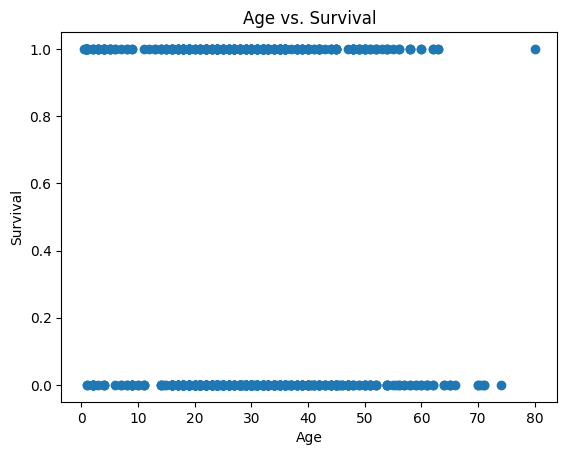

In [12]:
plt.scatter(df['Age'], df['Survived'])
plt.xlabel('Age')
plt.ylabel('Survival')
plt.title('Age vs. Survival')
plt.show()
# use bins next time, for age groups

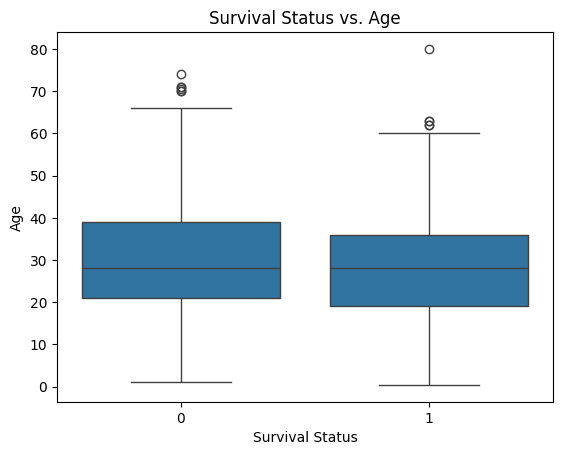

In [13]:
# determining relevance of age in model for cleaning purposes
sns.boxplot(x=df['Survived'], y=df['Age'])
plt.xlabel('Survival Status')
plt.ylabel('Age')
plt.title('Survival Status vs. Age')
plt.show()
# bins would help emphasize differences

In [14]:
# bin 0-20
# 20-30
# 30-40
# bin gilrs and boys

bins = [0, 18, 65, float('inf')]  
labels = ['Child', 'Adult', 'Senior'] 

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,Adult
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,Adult
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,Adult


In [15]:
# age dislays an 8% correlation with survival
correlation = df[['Survived', 'Age']].corr()
print(correlation)

          Survived       Age
Survived  1.000000 -0.077221
Age      -0.077221  1.000000


In [16]:
cross_tab = pd.crosstab(df['Pclass'], df['Survived'])
print(cross_tab)

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


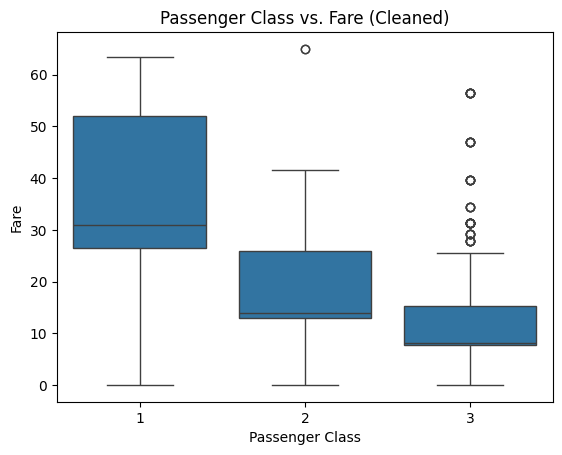

In [17]:
# bin the fare based on class, however many groups make sense

# Remove Outliers 
# remove values outside 1.5 times IQR
df_cleaned = df
Q1 = df_cleaned['Fare'].quantile(0.25)
Q3 = df_cleaned['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df_cleaned = df_cleaned[(df_cleaned['Fare'] >= lower) & (df_cleaned['Fare'] <= upper)]

# Step 3: Data Transformation (if necessary)
# For example, log transformation

# Plotting the cleaned data
sns.boxplot(x=df_cleaned['Pclass'], y=df_cleaned['Fare'])
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.title('Passenger Class vs. Fare (Cleaned)')
plt.show()

 

In [26]:
correlation = df[['Fare', 'Survived']].corr()
print(correlation)
# indicates a positive correlation between 'Fare' and 'Survived'

              Fare  Survived
Fare      1.000000  0.257307
Survived  0.257307  1.000000


In [18]:
cross_tab = pd.crosstab(df['Survived'], df['Fare'])
print(cross_tab)


Fare      0.0000    4.0125    5.0000    6.2375    6.4375    6.4500    \
Survived                                                               
0               14         1         1         1         1         1   
1                1         0         0         0         0         0   

Fare      6.4958    6.7500    6.8583    6.9500    ...  153.4625  164.8667  \
Survived                                          ...                       
0                2         2         1         1  ...         1         0   
1                0         0         0         0  ...         2         2   

Fare      211.3375  211.5000  221.7792  227.5250  247.5208  262.3750  \
Survived                                                               
0                0         1         1         1         1         0   
1                3         0         0         3         1         2   

Fare      263.0000  512.3292  
Survived                      
0                2         0  
1                2  

In [19]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,Adult
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,Adult
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,Adult


In [20]:
correlation = df[['Survived', 'Sex']].corr()
print(correlation)

          Survived       Sex
Survived  1.000000 -0.543351
Sex      -0.543351  1.000000


In [21]:
%pip install scikit-learn


You should consider upgrading via the '/Users/mannbellani/Documents/PythonProject/VirtualEnv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [22]:
# determining relevance of age in model for cleaning purposes
cross_tab = pd.crosstab(df['Survived'], df['Cabin'])
print(cross_tab)

Cabin     A10  A14  A16  A19  A20  A23  A24  A26  A31  A32  ...  E8  F E69  \
Survived                                                    ...              
0           1    1    0    1    0    0    1    0    0    1  ...   0      0   
1           0    0    1    0    1    1    0    1    1    0  ...   2      1   

Cabin     F G63  F G73  F2  F33  F38  F4  G6  T  
Survived                                         
0             1      2   1    0    1   0   2  1  
1             0      0   2    3    0   2   2  0  

[2 rows x 147 columns]


In [23]:
# dropping cabin as a feature, since most of the dataset has a null value for it and it seems irrelevant based on EDA
df = df.drop('Cabin', axis=1)
df = df.drop('Embarked', axis=1)
# print(df_bank.info())
print('Shape of dataframe:', df.shape)
df.head()

Shape of dataframe: (891, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,Adult


In [24]:
feature = df.drop('Survived', axis=1)

target = df['Survived']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature , target, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)


print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)
#ilock istead of train test split, there are other ways
#look at indwxing

Shape of training feature: (712, 10)
Shape of testing feature: (179, 10)
Shape of training label: (712,)
Shape of training label: (179,)
